In [537]:
import numpy as np
import matplotlib.pyplot as plt

### Forest

Burning Forest Rule
- Land = 0
- Tree = 1
- Burning Tree = .5

Simplified Problem without lightning accident

In [554]:
from random import random

class Forest():
    def __init__(self, tree_prob: float, fire_prob:float, shape:list, edge:int=3):
        self.tree_prob = tree_prob
        self.fire_prob = fire_prob
        self.forest_grid = np.zeros(shape)
        self.fire_grid = np.zeros(shape)
        self.tree_grid = np.zeros(shape)
        self.EDGE = edge
    
    def createTree(self) -> None:
        for i in range(self.EDGE, self.forest_grid.shape[0]-self.EDGE):
            for j in range(self.EDGE, self.forest_grid.shape[1]-self.EDGE):
                if random() <= self.tree_prob:
                    self.tree_grid[i][j]=1
                    self.forest_grid[i][j]=1

    def show_firemap(self):
        return self.forest_grid, self.tree_grid, self.fire_grid
    
    def show_forest(self):
        return self.forest_grid
    
    def initiate_fire(self):
        for i in range(self.EDGE, self.forest_grid.shape[0]-self.EDGE):
            for j in range(self.EDGE, self.forest_grid.shape[1]-self.EDGE):
                if self.forest_grid[i][j] == 1:
                    if random() <= self.fire_prob:
                        self.fire_grid[i][j]=1
                        self.forest_grid[i][j]=.5
    
    def fire(self, row, col):
        if self.forest_grid[row][col] == 1:
            if random() <= self.fire_prob:
                self.fire_grid[row][col]=1
                self.forest_grid[row][col]=.5

    
    def fire_spread(self):
        for i in range(self.EDGE, self.forest_grid.shape[0]-self.EDGE):
            for j in range(self.EDGE, self.forest_grid.shape[1]-self.EDGE):
                if self.forest_grid[i][j] == .5:
                    self.fire(i-1, j)
                    self.fire(i, j+1)
                    self.fire(i+1, j)
                    self.fire(i, j-1)
                    self.forest_grid[i][j]=0
                    self.tree_grid[i][j]=0
                    self.fire_grid[i][j]=0

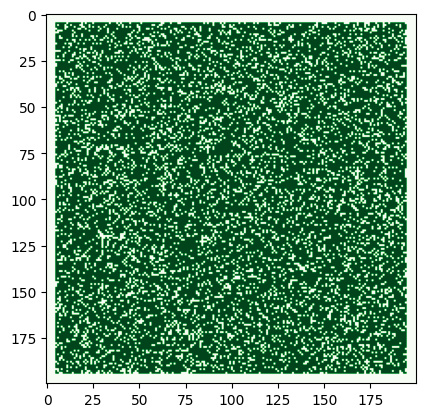

In [577]:
myForest = Forest(tree_prob=.8, fire_prob=.4, shape=[200,200], edge=5)
myForest.createTree()
forest = myForest.show_forest()
fig = plt.imshow(forest, cmap='Greens')

In [580]:
myForest.initiate_fire()

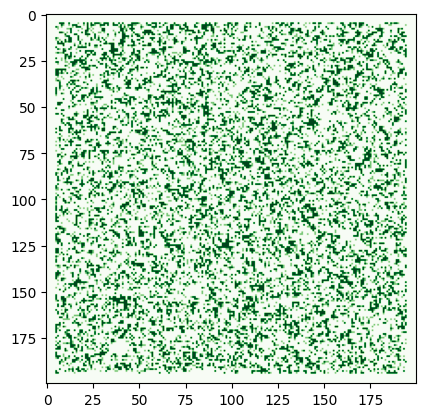

In [582]:
myForest.fire_spread()
forest, tree, fire = myForest.show_firemap()
fig2, ax = plt.subplots()

forest = ax.imshow(forest, cmap='Greens')
plt.show()